# Supervised Learning with scikit-learn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Main concepts

- the predicted values are known
- aim: Predict the target values of unseen data, given the features
- supervised learning uses features to predict the value of a target

### Types of supervised learning:
- classification (target variable consists of ***categories***). For example, whether the transaction is a fraud or not (binary classification).

- regression (target variable is ***continuous***). For example model can use features such as number of bedrooms and the size of a property to predict the target variable: price of the property

Feature == predictor variable == independent variable

Target variable == dependent variable == response variable

### Before you use supervised learning

Requirements:
- no missing values
- data in numeric format
- data stored in pandas DataFrame or NumPy array

1) Perform Exploratory Data Analysis (EDA) first

### scikit-learn syntax

In [ ]:
#Example, do not run!

from sklearn.module import Model
model = Model()
model.fit(X, y)

predictions = model.predict(X_new)
print(predictions)

## The classification challenge

Classifying labels of unseen data:
1) Build a model
2) Model learns from the labeled data we pass it on (training data)
3) Pass unlabeled data to the model as input
3) Model predicts the labels of the unseen data

### k-Nearest Neighbors

Helpful for classification problems

The idea - predict the label of a data point by
- looking at the k closest labeled data points
- taking a majority of vote

In [17]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv("databases/telecom_churn.csv")

#We use .values to convert X and y in numpy arrays as it is required by tht kNN
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

predictions = knn.predict(X_new)
print(f"Predictions: {predictions}")

(3333, 2) (3333,)
Predictions: [1 0 0]


## Measuring model performance - classification

in classification accuracy is a commonly used metric

It is important not to calculate accuracy on the model with whichwe fit data as it isn't reliable 


1) Split data into Training set and Test set
2) Fit classifier on training set
3) Calculate accuracy using test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21,
                                                    stratify=y) 
                        #to have equal amount of churned clients in both training and test set
#four arrays are returned

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


We get an accuracy of 88%. It is low cause our data has a 9 to 1 ratio

**Model complexity:**

Larger k = less complex model = can cause underfitting

Smaller k = more complex model = can lead to overfitting

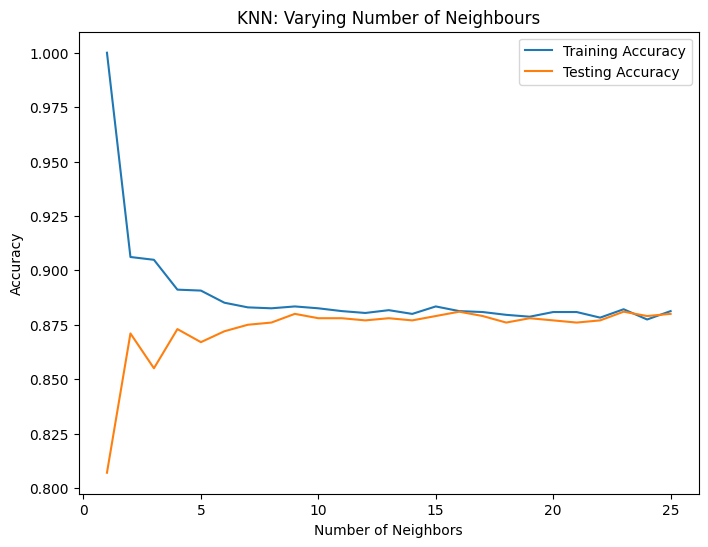

In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title("k-NN: Varying Number of Neighbours")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## Introduction to regression

Continuous targets like the price of a house or country's GDP

In [22]:
diabetes_df = pd.read_csv("databases/diabetes_clean.csv")
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
X = diabetes_df.drop("glucose", axis=1).values #converting to array
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [33]:
#Trying to use a single feature - bmi
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape) #Features must be at least 2d arrays to be accepted by sckitit-learn

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768,) (768,)
(768, 1)


Text(0.5, 0, 'Body Mass Index')

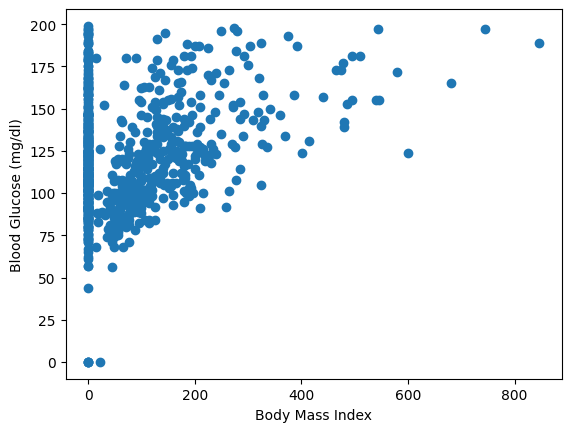

In [39]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

### Linear regression (model)

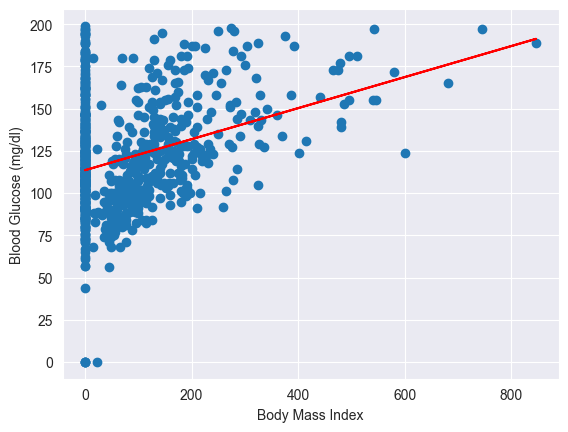

In [53]:
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color="red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Linear regression using all features

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

Metric - **R squared** (1 - features completely explain target variables)

In [47]:
R = reg_all.score(X_test, y_test) #to calculate R squared
print(R)

0.28280468810375115


**MSE** is measured in targets units, squared

To convert to a value itself (without being squared), we use **RMSE** = MSE^(1/2)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error(y_test, y_pred, squared=False)

c:\Users\Маша\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


26.341459582232265

## Cross-validation

Cross-validation motivation
- model performance is dependent on the way we split up the data
- Not representative of the model's ability to generalize to unseen data

The idea is to split up data into 5 folds (groups)

In [66]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

#calculates R squared by using .score automatically
cv_results = cross_val_score(reg, X, y, cv=kf)

print(np.mean(cv_results))
print(cv_results.std())
print(np.quantile(cv_results, [0.025, 0.975]))

0.3190969786734479
0.0701532061011419
[0.24088592 0.41580685]


## Regularized regression

Basically the idea is that this approach help you to avoid overfitting your model with too many features

**Ridge regression**
- ridge penalizes large positive or negative coefficients

In [70]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.26423984812668155, 0.19292424694100963]


**Lasso regression**
- select important features 
- shrink the coefficients of less important features to zero 

In [76]:
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


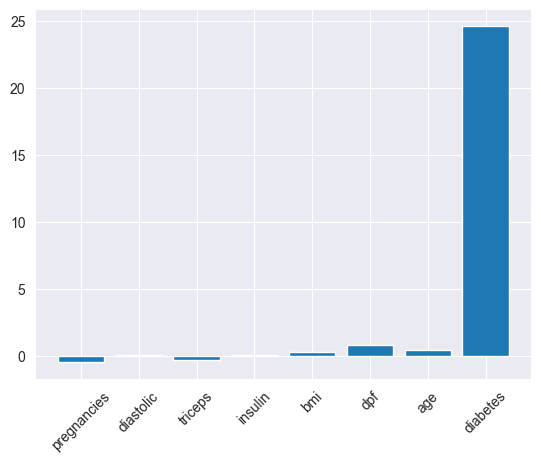

In [75]:
#Another Example

from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## How good is your model?